In [32]:
import numpy as np
import pandas as pd
import json

from obspy import Stream, Trace, UTCDateTime

from tqdm import tqdm
from tsfresh import select_features, extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction.settings import from_columns

%matplotlib inline

### Load datasets

In [26]:
# Folders:
root = 'train_test_mixed'
train_folder = f'{root}/train/'
test_folder = f'{root}/test/'
mixed_folder = f'{root}/mixed/'

In [27]:
# Mixed, train, test sets:
mixed_info = np.load(mixed_folder + 'mixed_info.npy', allow_pickle=True)
mixed_trace = np.load(mixed_folder + 'mixed_trace.npy', allow_pickle=True)

train_info = np.load(train_folder + 'train_info.npy', allow_pickle=True)
train_trace = np.load(train_folder + 'train_trace.npy', allow_pickle=True)

test_info = np.load(test_folder + 'test_info.npy', allow_pickle=True)
test_trace = np.load(test_folder + 'test_trace.npy', allow_pickle=True)

### Attempt streamer
Tried using: https://towardsdatascience.com/earthquake-prediction-faffd7160f98

In [30]:
def create_stream(trace, info):
    info = json.loads(info)
    station = info['trace_stats']['station']
    channels = info['trace_stats']['channels']
    sampl_rate = info['trace_stats']['sampling_rate']
    start_time = UTCDateTime(info['trace_stats']['starttime'])

    trace_BHE = Trace(
        data= trace[0],
        header={
            'station': station,
            'channel': channels[0],
            'sampling_rate': sampl_rate,
            'starttime': start_time
        }
    )

    trace_BHN = Trace(
        data= trace[1],
        header={
            'station': station,
            'channel': channels[1],
            'sampling_rate': sampl_rate, 
            'starttime': start_time
        }
    )
    trace_BHZ = Trace(
        data= trace[2],
        header={
            'station': station,
            'channel': channels[2],
            'sampling_rate': sampl_rate,
            'starttime': start_time
        }
    )

    # Assemple into a Stream
    stream = Stream([trace_BHE, trace_BHN, trace_BHZ])
    return stream

In [42]:
stream = create_stream(train_trace[0], train_info[0])

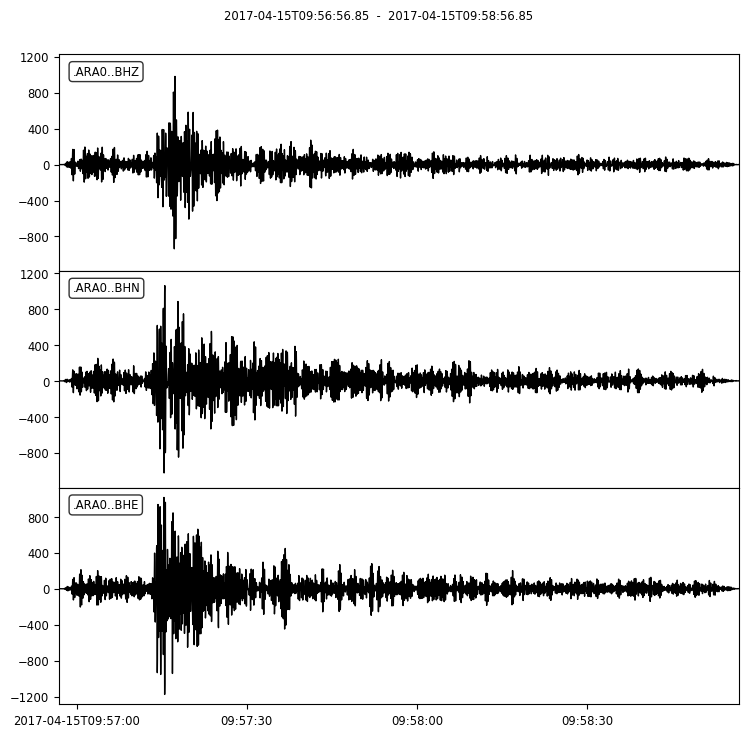

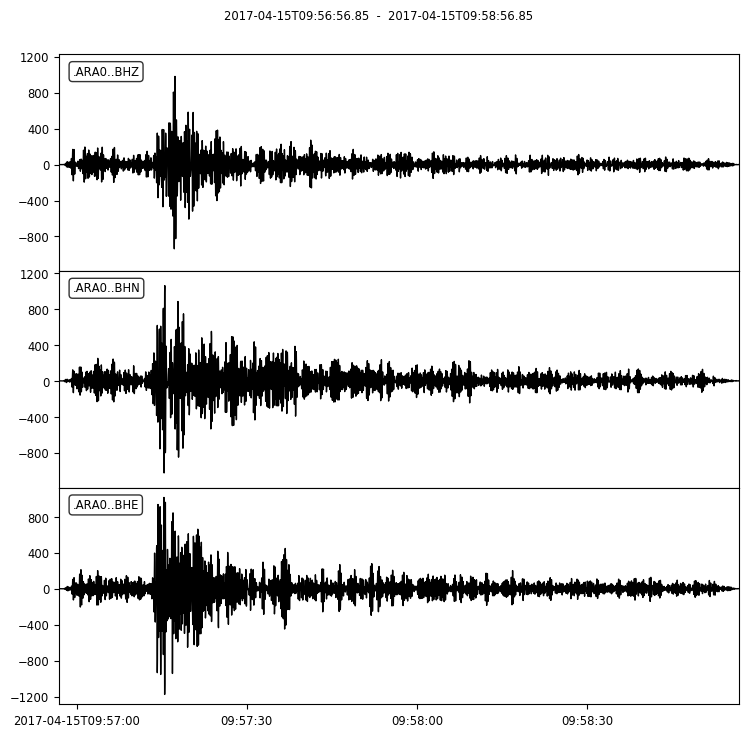

In [52]:
stream = create_stream(train_trace[0], train_info[0])
stream.detrend('demean')
stream.taper(max_percentage=0.05, type='cosine')
stream.filter('bandpass', freqmin=3, freqmax=5.0)
stream.plot()

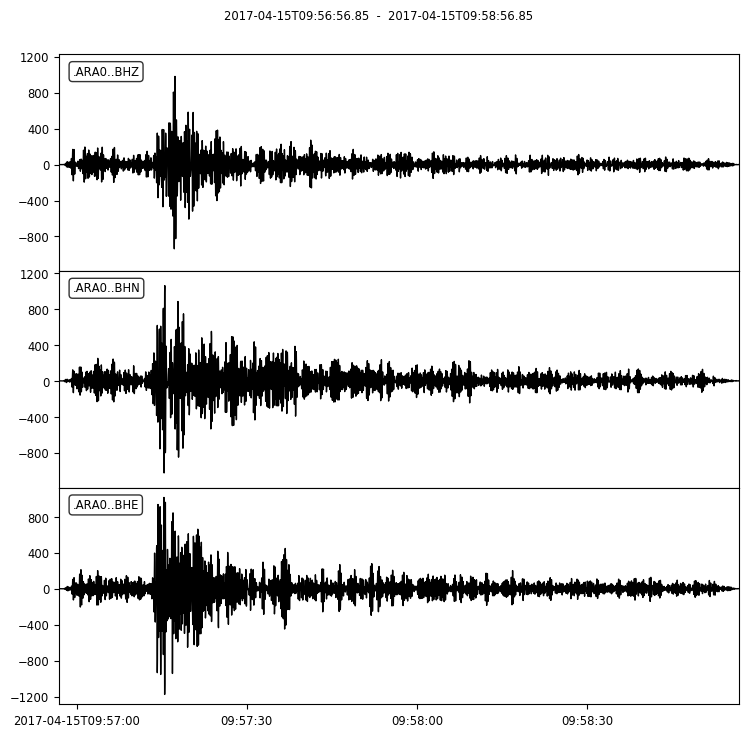

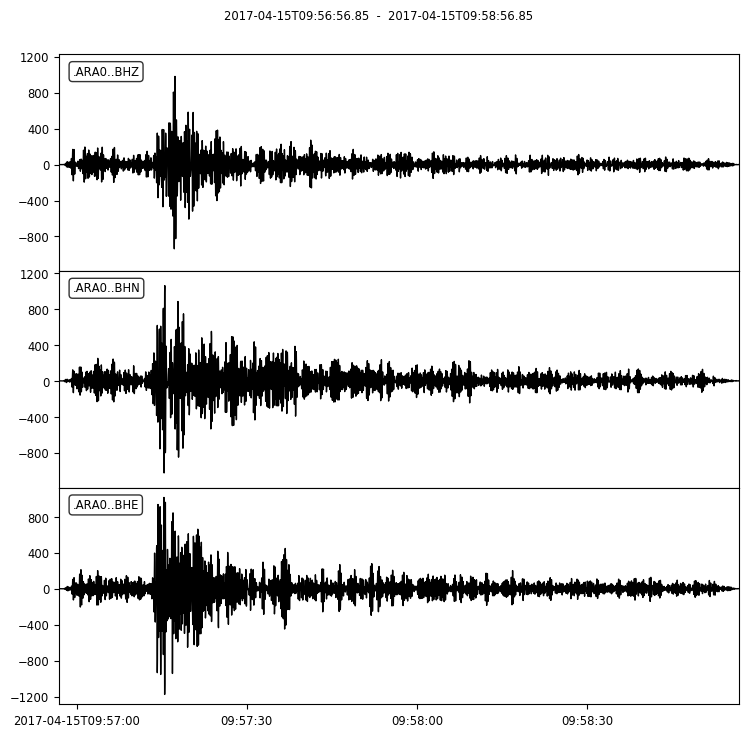

In [33]:

# Remove 'trend', e.g. remove linear offset from 0:
stream.detrend('demean')

# Taper the traces, meaning the ends will go gradually to 0 -- this is required before filtering
stream.taper(max_percentage=0.05, type='cosine')

# Apply a bandpass filter, selecting frequencies from 3 to 5 Hz
stream.filter('bandpass', freqmin=3.0, freqmax=5.0)

# Now we can plot it again, and see that the signal is more pronounced
stream.plot()